In previous, we introduced how to access and modify portions of arrays using simple indices, slice, and boolean masks. In this section, we will look at another style of array indexing, known as *fancy indexing*. Fancy indexing is like simple indexing, but passing arrays of indices in place of single scalars.

# Exploring Fancy Indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [4]:
# Life without fancy indexing is miserable...
[x[3], x[7], x[2]]

# Life with fancy indexing is so fancy!
idx = [3,7,4]
x[idx]

array([71, 86, 60])

**Remark:** When using fancy indexing, the shape of the result reflects the shape of the index array rather than the shape of the array being indexed

In [6]:
idx = np.array([[3,7],
                [4,5]])
x[idx]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions. Consider the following array:

In [3]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
row = np.array([0,1,2])
col = np.array([2,1,3])

# Take a guess - what will this return?
X[row,col]



array([ 2,  5, 11])

In [19]:
row[:,np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [11]:
X[row[:,np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

**Question:** How do we use fancy indexing to copy the entire array using two vectors? 

**Question:** Using fancy indexing, select the even rows and odd columns

# Combined Indexing

In [20]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [4]:
# Combine fancy and simple indices
X[2, [2,0,1]]

array([10,  8,  9])

In [5]:
# Combine fancy indexing with slicing
X[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [34]:
# Combine fancy indexing with masking
mask = np.array([1,0,1,0], dtype=bool)
print(row)
y = X[row[:, np.newaxis], mask]
y

[0 1 2]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# Example: Selecting Random Points

In [35]:
mean = [0,0]
cov = [[1,2], 
       [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

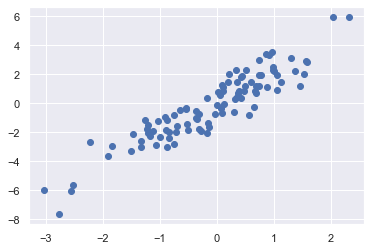

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:,0], X[:,1])

We will use fancy indexing to select 20 random points, we will do so by first choosing 20 random indices with no repeats, and then use these indices to select a portion of the original array

In [37]:
indices = np.random.choice(X.shape[0], 20, replace=False)

In [38]:
indices

array([47,  7, 12, 71, 79, 49, 55, 74, 58, 93, 63, 68, 60, 48, 40, 90, 80,
        2, 43, 61])

In [44]:
selection = X[indices,:]
selection.shape

(20, 2)

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

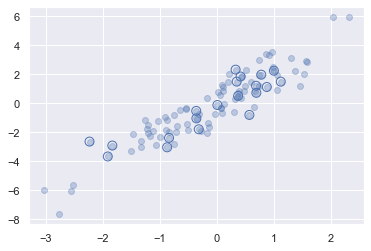

In [57]:
plt.scatter(X[:,0], X[:,1], alpha = 0.3)
plt.scatter(selection[:,0], selection[:,1],facecolors='none', edgecolors='b', s=80);

This is used to quickly partition datasets, as is often needed in train/test splitting for validation.

# Modifying array with fancy indexing

In [2]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can use any assignment-type operator for this. For example:

In [3]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that repeating indices with these operators can cause some potentionally unexpected results. Consider the following:

In [5]:
x = np.zeros(10)
x[np.array([0,0])] = [4,6]

# where did 4 go?
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])